
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the **Option C**.

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
""" 

Function to display images

"""

def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax

    num_images = len(filenames)

    if num_images == 1:
        # Single image case
        data = pst.read_rst(filenames[0])
        data[data==0]=np.nan
        vmin, vmax = compute_vmin_vmax(data)

        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filenames[0]))
        fig.colorbar(im, ax=ax)
        plt.tight_layout()
        plt.show()
    else:
        # Multiple image case
        ncols = min(max_cols, num_images)
        nrows = int(np.ceil(num_images / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
        axes = np.array(axes).reshape(-1)  # Flatten in case it's a 2D grid

        for i, filename in enumerate(filenames):
            data = pst.read_rst(filename)
            data[data==0]=np.nan
            vmin, vmax = compute_vmin_vmax(data)
            ax = axes[i]
            im = ax.imshow(data, vmin=vmin, vmax=vmax)
            ax.set_title(os.path.basename(filename))
            fig.colorbar(im, ax=ax)

        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


#### 1. Extract multilooked C4/C3/T4/T3 matrix from NISAR full-pol RSLC data
##### using **`polsartools.nisar_rslc`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/sensors/nisar.html#rslc-nisar-rslc) or run `print(polsartools.nisar_rslc.__.doc__)`


In [3]:
"""
The following function extracts a single-look S2 or multilooked C4/C3/T4/T3 matrix from NISAR full-polarimetric RSLC data. 

Provide path to the NISAR RSLC .h5 file.
"""


inFile =r"../data/NISAR/RSLC_QP.h5"

pst.nisar_rslc(inFile,mat='C3',azlks=22,rglks=10) 


Detected L-band ['HH' 'HV' 'VV' 'VH'] 
Extracting C3 matrix elements...


Processing chunks:   0%|          | 0/688 [00:00<?, ?it/s]

Processing chunks:   0%|          | 1/688 [00:04<56:22,  4.92s/it]

Processing chunks:   1%|          | 7/688 [00:05<06:05,  1.86it/s]

Processing chunks:   2%|▏         | 11/688 [00:05<03:25,  3.30it/s]

Processing chunks:   2%|▏         | 17/688 [00:05<02:04,  5.38it/s]

Processing chunks:   4%|▎         | 25/688 [00:05<01:09,  9.56it/s]

Processing chunks:   4%|▍         | 29/688 [00:05<00:56, 11.72it/s]

Processing chunks:   5%|▍         | 33/688 [00:06<01:08,  9.59it/s]

Processing chunks:   6%|▌         | 39/688 [00:06<00:47, 13.73it/s]

Processing chunks:   7%|▋         | 47/688 [00:06<00:37, 17.32it/s]

Processing chunks:   7%|▋         | 51/688 [00:07<00:47, 13.36it/s]

Processing chunks:   9%|▉         | 63/688 [00:07<00:28, 21.81it/s]

Processing chunks:  10%|▉         | 67/688 [00:08<00:39, 15.68it/s]

Processing chunks:  11%|█▏        | 79/688 [00:08<00:24, 24.39it/s]

Processing chunks:  12%|█▏        | 84/688 [00:08<00:34, 17.33it/s]

Processing chunks:  14%|█▍        | 95/688 [00:09<00:25, 23.23it/s]

Processing chunks:  14%|█▍        | 99/688 [00:10<00:42, 13.74it/s]

Processing chunks:  16%|█▌        | 111/688 [00:10<00:30, 18.66it/s]

Processing chunks:  17%|█▋        | 114/688 [00:10<00:41, 13.98it/s]

Processing chunks:  18%|█▊        | 126/688 [00:11<00:26, 21.13it/s]

Processing chunks:  19%|█▉        | 130/688 [00:11<00:36, 15.13it/s]

Processing chunks:  20%|██        | 141/688 [00:11<00:23, 23.02it/s]

Processing chunks:  21%|██▏       | 147/688 [00:12<00:39, 13.85it/s]

Processing chunks:  23%|██▎       | 158/688 [00:12<00:26, 20.24it/s]

Processing chunks:  24%|██▎       | 163/688 [00:13<00:34, 15.27it/s]

Processing chunks:  25%|██▌       | 175/688 [00:13<00:21, 23.54it/s]

Processing chunks:  26%|██▋       | 182/688 [00:14<00:27, 18.17it/s]

Processing chunks:  28%|██▊       | 191/688 [00:14<00:22, 22.08it/s]

Processing chunks:  28%|██▊       | 196/688 [00:15<00:27, 17.94it/s]

Processing chunks:  30%|███       | 207/688 [00:15<00:18, 25.62it/s]

Processing chunks:  31%|███       | 212/688 [00:15<00:26, 18.19it/s]

Processing chunks:  32%|███▏      | 223/688 [00:15<00:17, 25.96it/s]

Processing chunks:  33%|███▎      | 228/688 [00:16<00:27, 16.99it/s]

Processing chunks:  35%|███▍      | 239/688 [00:16<00:21, 21.21it/s]

Processing chunks:  35%|███▌      | 243/688 [00:17<00:26, 16.50it/s]

Processing chunks:  37%|███▋      | 254/688 [00:17<00:18, 22.91it/s]

Processing chunks:  38%|███▊      | 258/688 [00:18<00:25, 16.62it/s]

Processing chunks:  40%|███▉      | 272/688 [00:18<00:17, 24.31it/s]

Processing chunks:  40%|████      | 276/688 [00:18<00:22, 18.24it/s]

Processing chunks:  42%|████▏     | 287/688 [00:19<00:15, 26.47it/s]

Processing chunks:  42%|████▏     | 292/688 [00:19<00:22, 17.91it/s]

Processing chunks:  44%|████▍     | 303/688 [00:19<00:15, 24.33it/s]

Processing chunks:  45%|████▍     | 308/688 [00:20<00:22, 16.56it/s]

Processing chunks:  46%|████▋     | 319/688 [00:20<00:15, 23.89it/s]

Processing chunks:  47%|████▋     | 324/688 [00:21<00:23, 15.78it/s]

Processing chunks:  49%|████▊     | 335/688 [00:21<00:17, 20.40it/s]

Processing chunks:  49%|████▉     | 339/688 [00:22<00:21, 16.15it/s]

Processing chunks:  51%|█████     | 351/688 [00:22<00:13, 24.69it/s]

Processing chunks:  52%|█████▏    | 356/688 [00:23<00:19, 16.76it/s]

Processing chunks:  53%|█████▎    | 367/688 [00:23<00:17, 17.87it/s]

Processing chunks:  54%|█████▍    | 371/688 [00:24<00:22, 14.18it/s]

Processing chunks:  55%|█████▌    | 381/688 [00:24<00:14, 20.61it/s]

Processing chunks:  56%|█████▌    | 386/688 [00:25<00:21, 13.85it/s]

Processing chunks:  58%|█████▊    | 399/688 [00:25<00:13, 22.20it/s]

Processing chunks:  59%|█████▉    | 405/688 [00:25<00:16, 17.04it/s]

Processing chunks:  60%|██████    | 415/688 [00:26<00:12, 21.99it/s]

Processing chunks:  61%|██████    | 420/688 [00:26<00:15, 17.62it/s]

Processing chunks:  63%|██████▎   | 431/688 [00:26<00:10, 24.48it/s]

Processing chunks:  63%|██████▎   | 436/688 [00:27<00:14, 16.97it/s]

Processing chunks:  65%|██████▍   | 447/688 [00:27<00:10, 22.32it/s]

Processing chunks:  66%|██████▌   | 451/688 [00:28<00:14, 16.66it/s]

Processing chunks:  67%|██████▋   | 462/688 [00:28<00:09, 24.34it/s]

Processing chunks:  68%|██████▊   | 467/688 [00:29<00:13, 16.49it/s]

Processing chunks:  70%|██████▉   | 479/688 [00:29<00:08, 25.51it/s]

Processing chunks:  70%|███████   | 485/688 [00:29<00:10, 18.63it/s]

Processing chunks:  72%|███████▏  | 495/688 [00:29<00:07, 25.13it/s]

Processing chunks:  73%|███████▎  | 501/688 [00:30<00:09, 18.71it/s]

Processing chunks:  74%|███████▍  | 512/688 [00:30<00:07, 22.75it/s]

Processing chunks:  75%|███████▌  | 516/688 [00:31<00:10, 16.57it/s]

Processing chunks:  77%|███████▋  | 527/688 [00:31<00:07, 22.30it/s]

Processing chunks:  77%|███████▋  | 531/688 [00:32<00:09, 16.06it/s]

Processing chunks:  79%|███████▉  | 543/688 [00:32<00:06, 22.48it/s]

Processing chunks:  80%|███████▉  | 547/688 [00:33<00:08, 16.63it/s]

Processing chunks:  81%|████████▏ | 559/688 [00:33<00:05, 25.36it/s]

Processing chunks:  82%|████████▏ | 564/688 [00:33<00:06, 18.11it/s]

Processing chunks:  84%|████████▎ | 575/688 [00:33<00:04, 26.52it/s]

Processing chunks:  84%|████████▍ | 581/688 [00:34<00:05, 19.08it/s]

Processing chunks:  86%|████████▌ | 591/688 [00:34<00:03, 26.33it/s]

Processing chunks:  87%|████████▋ | 597/688 [00:35<00:04, 18.20it/s]

Processing chunks:  88%|████████▊ | 606/688 [00:35<00:03, 24.63it/s]

Processing chunks:  89%|████████▉ | 612/688 [00:36<00:04, 16.22it/s]

Processing chunks:  91%|█████████ | 623/688 [00:36<00:02, 22.58it/s]

Processing chunks:  91%|█████████▏| 628/688 [00:37<00:03, 15.30it/s]

Processing chunks:  93%|█████████▎| 639/688 [00:37<00:02, 20.95it/s]

Processing chunks:  93%|█████████▎| 643/688 [00:37<00:02, 15.39it/s]

Processing chunks:  95%|█████████▌| 654/688 [00:38<00:01, 22.72it/s]

Processing chunks:  96%|█████████▌| 659/688 [00:38<00:01, 15.95it/s]

Processing chunks:  98%|█████████▊| 671/688 [00:38<00:00, 24.30it/s]

Processing chunks:  98%|█████████▊| 677/688 [00:39<00:00, 19.90it/s]

Processing chunks: 100%|██████████| 688/688 [00:39<00:00, 28.41it/s]

Processing chunks: 100%|██████████| 688/688 [00:39<00:00, 17.45it/s]

Saved file ../data/NISAR\RSLC_QP\C3\C11.tif


Saved file ../data/NISAR\RSLC_QP\C3\C12_real.tif


Saved file ../data/NISAR\RSLC_QP\C3\C12_imag.tif


Saved file ../data/NISAR\RSLC_QP\C3\C13_real.tif


Saved file ../data/NISAR\RSLC_QP\C3\C13_imag.tif


Saved file ../data/NISAR\RSLC_QP\C3\C22.tif


Saved file ../data/NISAR\RSLC_QP\C3\C23_real.tif


Saved file ../data/NISAR\RSLC_QP\C3\C23_imag.tif


Saved file ../data/NISAR\RSLC_QP\C3\C33.tif


Execution time for nisar_rslc: 02:16 (min:sec)


#### 2. Speckle filtering using polarimetric refined-Lee filter

In [4]:

C3Folder = os.path.join(inFile.split('.h5')[0],'C3')
window_size = 3
pst.rlee(C3Folder,win=window_size)

Progress:   0%|          | 0/6 [00:00<?, ?block/s]

Progress:  17%|█▋        | 1/6 [00:03<00:16,  3.24s/block]

Progress:  50%|█████     | 3/6 [00:04<00:03,  1.15s/block]

Progress:  83%|████████▎ | 5/6 [00:04<00:00,  1.47block/s]

Progress: 100%|██████████| 6/6 [00:04<00:00,  1.31block/s]

Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C11.tif
Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C12_real.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C12_imag.tif
Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C13_real.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C13_imag.tif
Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C22.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C23_real.tif
Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C23_imag.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\C33.tif
Execution time for rlee: 6.00 seconds


#### 3. Generate a quick look Pauli RGB from the extracted matrix

Pauli RGB image saved as ../data/NISAR/RSLC_QP\rlee_3x3\C3\PauliRGB.png
Execution time for pauliRGB: 0.00 seconds


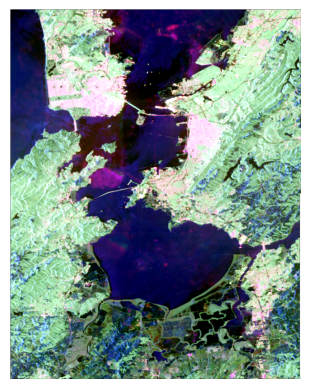

In [5]:

C3Folder = os.path.join(inFile.split('.h5')[0],f"rlee_{window_size}x{window_size}",'C3')
pst.pauliRGB(C3Folder)

#### 4. Generating Decomposition parameters

#### 4.1. Generate H/A/α Decomposition parameters

Progress:   0%|          | 0/6 [00:00<?, ?block/s]

Progress:  17%|█▋        | 1/6 [00:03<00:15,  3.05s/block]

Progress:  50%|█████     | 3/6 [00:08<00:08,  2.94s/block]

Progress:  67%|██████▋   | 4/6 [00:08<00:03,  1.97s/block]

Progress:  83%|████████▎ | 5/6 [00:11<00:02,  2.21s/block]

Progress: 100%|██████████| 6/6 [00:12<00:00,  1.61s/block]

Progress: 100%|██████████| 6/6 [00:12<00:00,  2.01s/block]

Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\H_fp.tif
Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\alpha_fp.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\anisotropy_fp.tif
Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\e1_norm.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\e2_norm.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\e3_norm.tif
Execution time for halpha_fp: 13.00 seconds


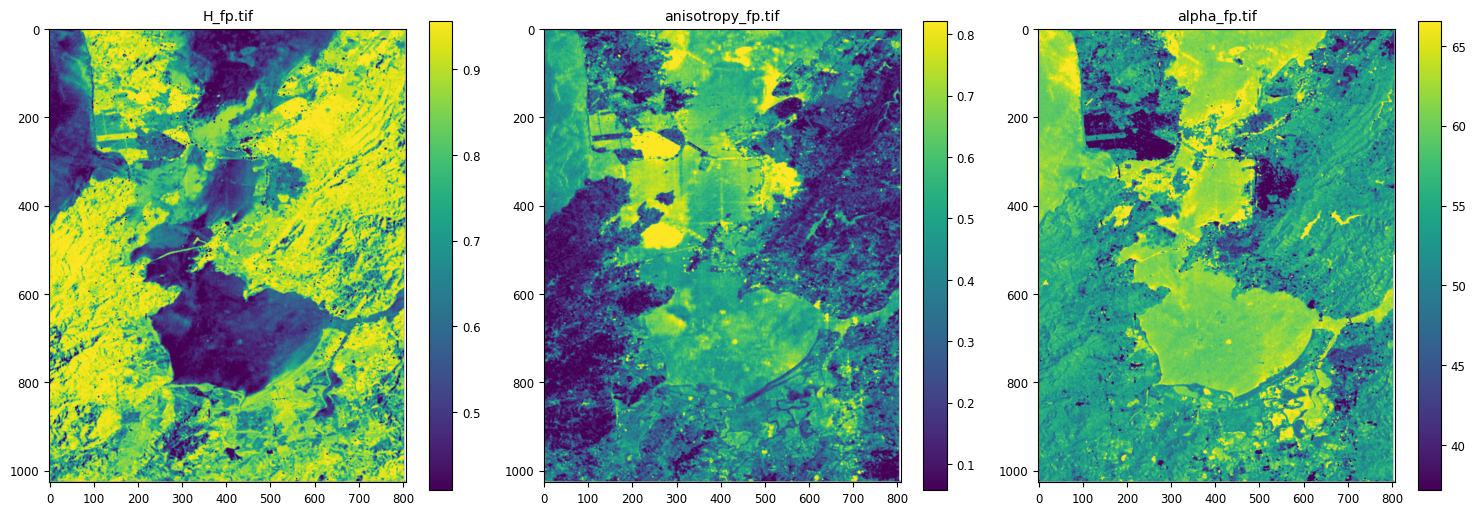

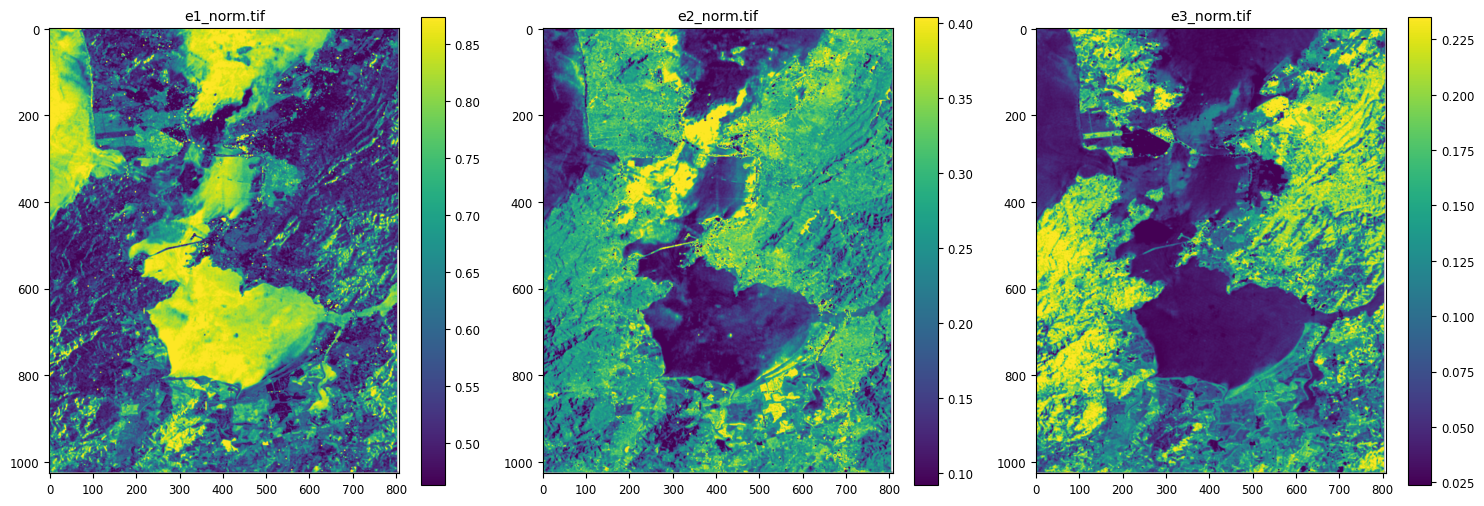

In [6]:

"""
The following function generates H/A/alpha demposition paramters: 
        Alpha, entropy, anisotropy and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""
# update the C3 folder based on your folder

pst.halpha_fp(C3Folder,win=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




#### Plot Entropy-Alpha 2D plane

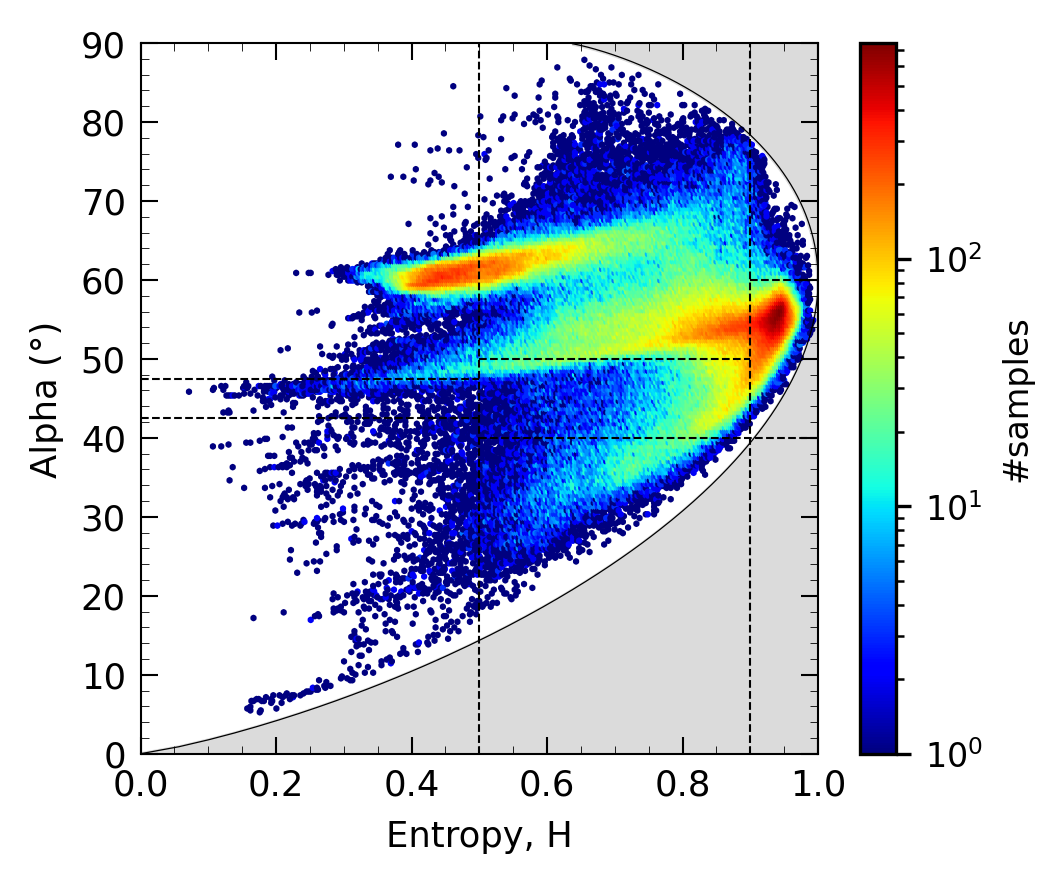

In [7]:
hFile = C3Folder + '/H_fp.tif'
alphaFile = C3Folder + '/alpha_fp.tif'

pst.halpha_plot_fp(hFile,alphaFile,cmap='jet',               
                   norm='log',
                   # path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  zone_ids=False,)

#### Plot a 3D Entropy-Anisotropy-Alpha plot

Execution time for haalpha_plot_fp: 3.00 seconds


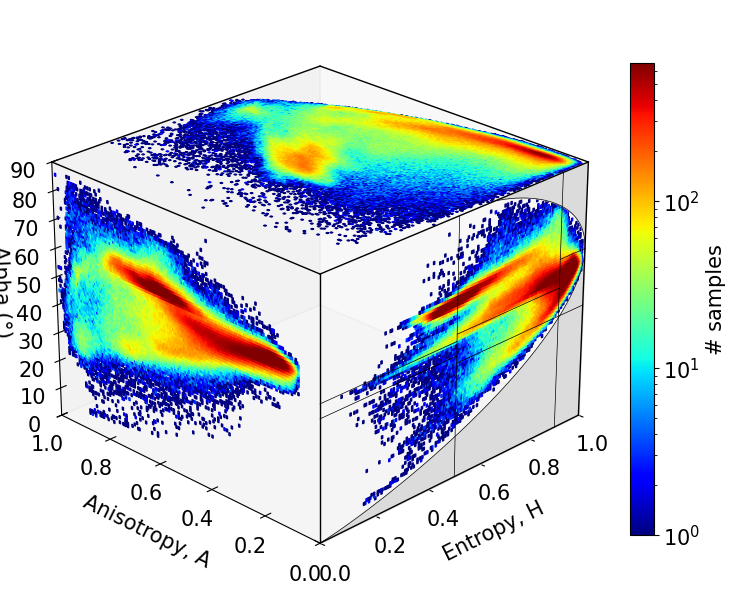

In [8]:
hFile = C3Folder + '/H_fp.tif'
aFile = C3Folder + '/anisotropy_fp.tif'
alphaFile = C3Folder + '/alpha_fp.tif'

pst.haalpha_plot_fp(hFile,aFile,alphaFile,cmap='jet',               
                   norm='log',
                   # path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  # zone_ids=False,
                   )

#### 4.2. Generate Yamaguchi 4-Component Decomposition parameters

In [9]:
"""
The following function generates Yamaguchi 4-Component Decomposition parameters: 
        Yam4co_odd, Yam4co_dbl, Yam4co_vol and Yam4co_hlx in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.yam4c_fp(C3Folder,win=3) 

Progress:   0%|          | 0/6 [00:00<?, ?block/s]

Progress:  17%|█▋        | 1/6 [00:03<00:15,  3.04s/block]

Progress:  33%|███▎      | 2/6 [00:03<00:05,  1.33s/block]

Progress:  50%|█████     | 3/6 [00:23<00:29,  9.96s/block]

Progress:  67%|██████▋   | 4/6 [00:23<00:12,  6.18s/block]

Progress:  83%|████████▎ | 5/6 [00:35<00:08,  8.28s/block]

Progress: 100%|██████████| 6/6 [00:36<00:00,  5.55s/block]

Progress: 100%|██████████| 6/6 [00:36<00:00,  6.01s/block]

Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\Yam4co_odd.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\Yam4co_dbl.tif
Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\Yam4co_vol.tif


Saved file ../data/NISAR/RSLC_QP\rlee_3x3\C3\Yam4co_hlx.tif
Execution time for yam4c_fp: 37.00 seconds


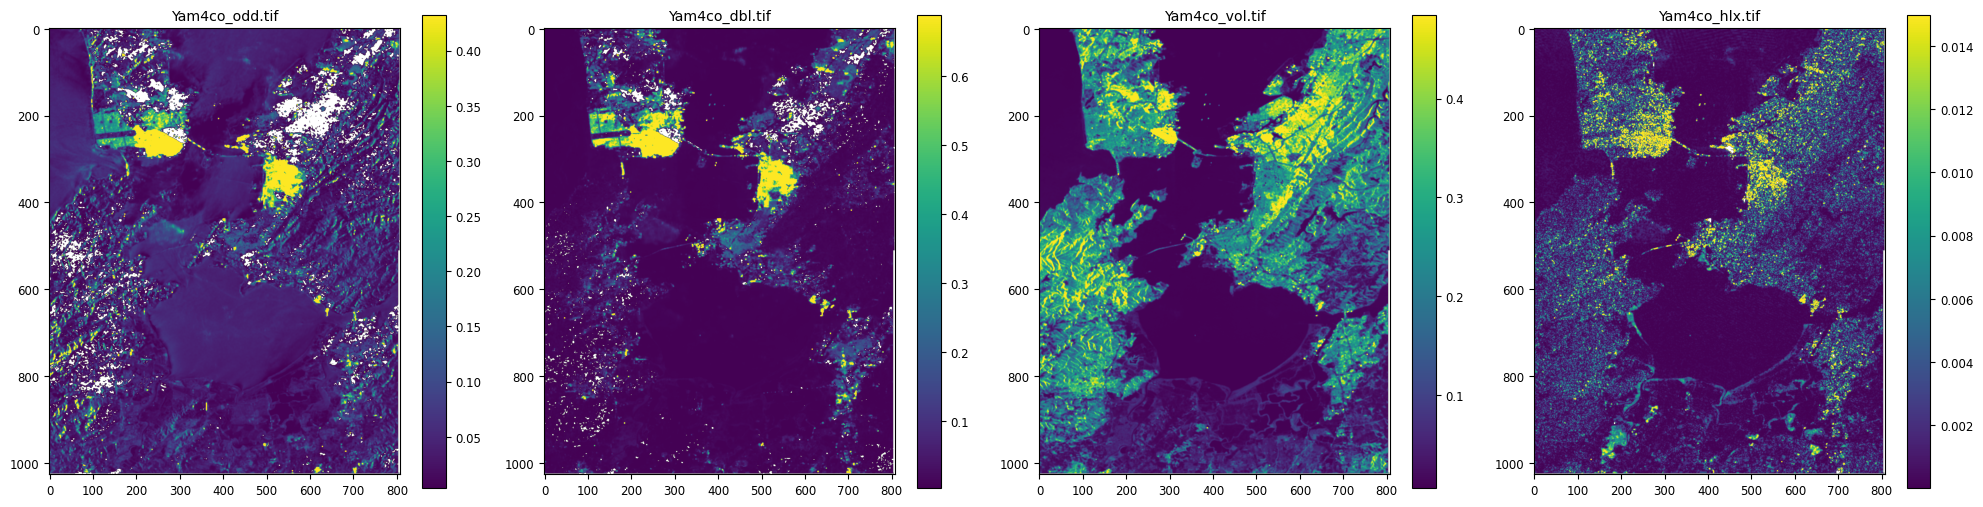

In [10]:
### Plotting
plot_images(os.path.join(C3Folder,'Yam4co_odd.tif'),
            os.path.join(C3Folder,'Yam4co_dbl.tif'),
            os.path.join(C3Folder,'Yam4co_vol.tif'),
            os.path.join(C3Folder,'Yam4co_hlx.tif'),
           )

#### Create False colour RGB from decomposed powers

RGB image saved as ../data/NISAR/RSLC_QP\rlee_3x3\C3\RGB.png
Execution time for rgb: 0.00 seconds


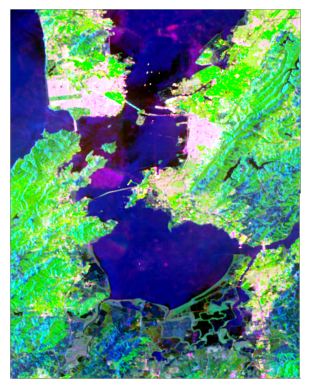

In [11]:

blue = os.path.join(C3Folder,'Yam4co_odd.tif')
red = os.path.join(C3Folder,'Yam4co_dbl.tif')
green = os.path.join(C3Folder,'Yam4co_vol.tif')

pst.rgb(red,green,blue)
